In [219]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,VotingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [220]:
company=pd.read_csv(r"C:\Users\AJAY\Downloads\Company_Data.csv")

In [221]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [222]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [223]:
company.shape

(400, 11)

In [224]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [225]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:>

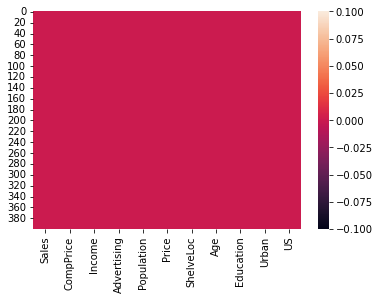

In [226]:
sns.heatmap(company.isna())

<AxesSubplot:>

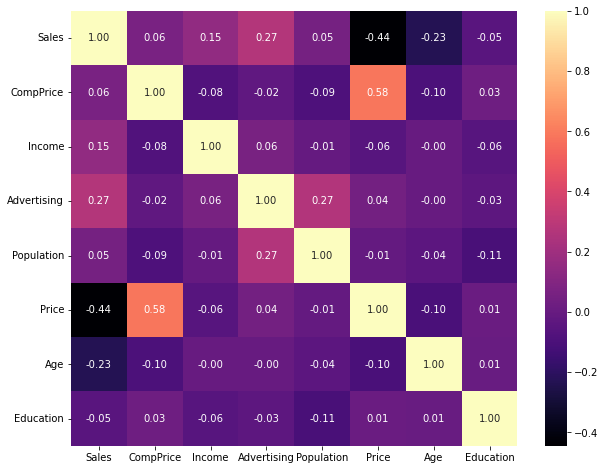

In [227]:
plt.figure(figsize=(10,8));
sns.heatmap(company.corr(),cmap='magma',annot=True,fmt=".2f")

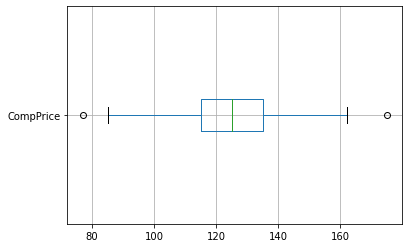

In [228]:
company.boxplot("CompPrice",vert=False)
Q1=np.percentile(company["CompPrice"],25)
Q3=np.percentile(company["CompPrice"],75)
IQR=Q3-Q1
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)
company[company["CompPrice"]<LW].shape
company[company["CompPrice"]>UW].shape
company["CompPrice"]=np.where(company["CompPrice"]>UW,UW,np.where(company["CompPrice"]<LW,LW,company["CompPrice"]))

<AxesSubplot:>

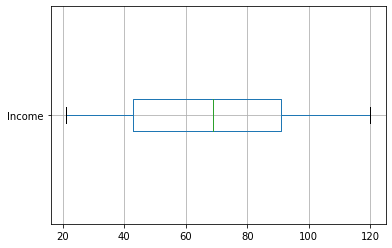

In [229]:
company.boxplot("Income",vert=False)

<AxesSubplot:>

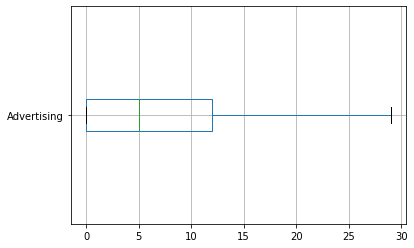

In [230]:
company.boxplot("Advertising",vert=False)

<AxesSubplot:>

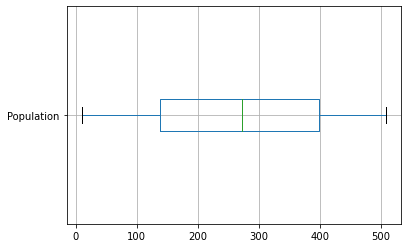

In [231]:
company.boxplot("Population",vert=False)

<AxesSubplot:>

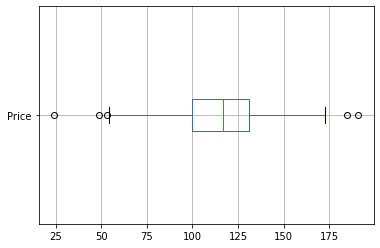

In [232]:
company.boxplot("Price",vert=False)

<AxesSubplot:>

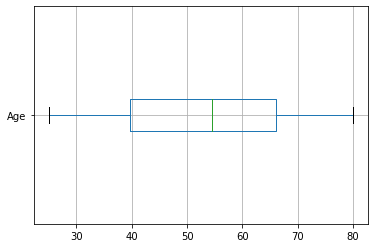

In [233]:
company.boxplot("Age",vert=False)

<AxesSubplot:>

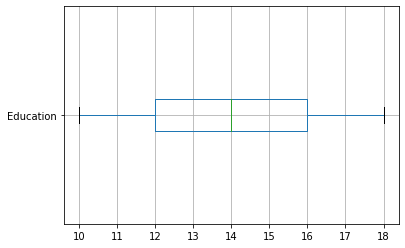

In [234]:
company.boxplot("Education",vert=False)

In [235]:
company["Sales"]=pd.cut(company["Sales"],bins=[0,4.2,8.01,12.01,16.27],labels=["Poor","Good","Very Good ","Excellent"])

In [236]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Very Good,138.0,73,11,276,120,Bad,42,17,Yes,Yes
1,Very Good,111.0,48,16,260,83,Good,65,10,Yes,Yes
2,Very Good,113.0,35,10,269,80,Medium,59,12,Yes,Yes
3,Good,117.0,100,4,466,97,Medium,55,14,Yes,Yes
4,Poor,141.0,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Excellent,138.0,108,17,203,128,Good,33,14,Yes,Yes
396,Good,139.0,23,3,37,120,Medium,55,11,No,Yes
397,Good,162.0,26,12,368,159,Medium,40,18,Yes,Yes
398,Good,100.0,79,7,284,95,Bad,50,12,Yes,Yes


In [237]:
y=company['Sales']
x=company.iloc[:,1:]

In [238]:
x.dtypes

CompPrice      float64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [239]:
Le=LabelEncoder()
Mm=MinMaxScaler()

In [240]:
x["CompPrice"]=Mm.fit_transform(x[["CompPrice"]])

x["Income"]=Mm.fit_transform(x[["Income"]])

x["Advertising"]=Mm.fit_transform(x[["Advertising"]])

x["Population"]=Mm.fit_transform(x[["Population"]])

x["Price"]=Mm.fit_transform(x[["Price"]])

x["Age"]=Mm.fit_transform(x[["Age"]])

x["Education"]=Mm.fit_transform(x[["Education"]])

x["ShelveLoc"]=Le.fit_transform(x[["ShelveLoc"]])
x["ShelveLoc"]=pd.DataFrame(x["ShelveLoc"])

x["Urban"]=Le.fit_transform(x["Urban"])
x["Urban"]=pd.DataFrame(x["Urban"])

x["US"]=Le.fit_transform(x["US"])
x["US"]=pd.DataFrame(x["US"])

y=Le.fit_transform(company["Sales"])
y=pd.DataFrame(y)

In [241]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.6625,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,0.3250,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,0.3500,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,0.4000,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,0.7000,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0.6625,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,0.6750,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,0.9625,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,0.1875,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [243]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
ypred=lg.predict(x_test)

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.54      0.80      0.65        76
           2       0.29      0.12      0.17        17
           3       0.51      0.38      0.44        55
           4       0.00      0.00      0.00         1

    accuracy                           0.53       160
   macro avg       0.27      0.26      0.25       160
weighted avg       0.47      0.53      0.48       160



In [244]:
print(lg.score(x_train,y_train))
print(lg.score(x_test,y_test))

0.6291666666666667
0.525


In [245]:
def predict(model):
    model=model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    
    print(classification_report(y_test,ypred))
    print(model.score(x_train,y_train))
    print(model.score(x_test,y_test))
    

In [246]:
predict(LogisticRegression())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.54      0.80      0.65        76
           2       0.29      0.12      0.17        17
           3       0.51      0.38      0.44        55
           4       0.00      0.00      0.00         1

    accuracy                           0.53       160
   macro avg       0.27      0.26      0.25       160
weighted avg       0.47      0.53      0.48       160

0.6291666666666667
0.525


In [247]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.11      0.09      0.10        11
           1       0.62      0.66      0.64        76
           2       0.14      0.06      0.08        17
           3       0.45      0.53      0.49        55
           4       0.00      0.00      0.00         1

    accuracy                           0.51       160
   macro avg       0.27      0.27      0.26       160
weighted avg       0.48      0.51      0.49       160

1.0
0.50625


In [248]:
RF=RandomForestClassifier(max_depth=6,max_leaf_nodes=20)
RF.fit(x_train,y_train)
y_predtrain=RF.predict(x_train)
y_predtest=RF.predict(x_test)


In [249]:
from sklearn.metrics import accuracy_score

In [250]:
acc1=accuracy_score(y_train,y_predtrain)
acc2=accuracy_score(y_test,y_predtest)

In [251]:
acc1


0.8458333333333333

In [252]:
acc2

0.55

KFOLD cross valdidation

In [256]:
kf=KFold(n_splits=10)

score=cross_val_score(GradientBoostingClassifier(),x,y,cv=kf)
score

array([0.575, 0.55 , 0.6  , 0.65 , 0.675, 0.625, 0.575, 0.6  , 0.575,
       0.675])

In [258]:
score.mean()

0.61

# Bagging

In [ ]:
Rf=RandomForestClassifier(max_depth=5)
Bag=BaggingClassifier(base_estimator=Rf,max_features=0.6,n_estimators=100)
Bag.fit(x_train,y_train)
ypred=Bag.predict(x_train)
ypredt=Bag.predict(x_test)


In [ ]:
ac1=accuracy_score(y_train,ypred)
ac2=accuracy_score(y_test,ypredt)

In [ ]:
ac1,ac2

In [ ]:
Training_accuracy = []
Test_accuracy = []


In [ ]:
for i in range(1,10):
    classifier = RandomForestClassifier(max_depth=i,criterion="entropy") 
    regressor.fit(x_train,y_train)
    Y_pred_train = regressor.predict(x_train)
    Y_pred_test = regressor.predict(x_test)
    Training_accuracy.append(accuracy_score(y_train,Y_pred_train))
    Test_accuracy.append(accuracy_score(y_test,Y_pred_test))


In [257]:

pd.DataFrame(Training_accuracy)
pd.DataFrame(Test_accuracy)
pd.concat([pd.DataFrame(range(1,10)) ,pd.DataFrame(Training_accuracy),pd.DataFrame(Test_accuracy)],axis=1)    


,0,0,0
0,1.0,0.520833,0.48125
1,2.0,0.625000,0.53750
2,3.0,0.708333,0.56250
3,4.0,0.783333,0.60000
4,5.0,0.845833,0.59375
5,6.0,0.950000,0.58750
6,7.0,0.991667,0.61250
7,8.0,1.000000,0.56875
8,9.0,1.000000,0.60000
9,NaN,1.000000,0.60625
